## core visualizations

In [4]:
# import & Setup for visualization

#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load your cleaned dataset
df = pd.read_csv("E:\\data_analytics_project\\retail_sales_dataset\\data\\retail_sales_cleaned.csv")

# Create visuals folder to save visualization
os.makedirs("visuals", exist_ok=True)

#set seaborn style
sns.set(style="whitegrid", palette="pastel")

df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Month,Year,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,November,2023,Young Adult (26-35)
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,February,2023,Young Adult (26-35)
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,January,2023,Adult (36-50)
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,May,2023,Adult (36-50)
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,May,2023,Young Adult (26-35)


## Gender Distribution of Customers

C:\Users\abhay\AppData\Local\Temp\ipykernel_11460\2000481712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='coolwarm')


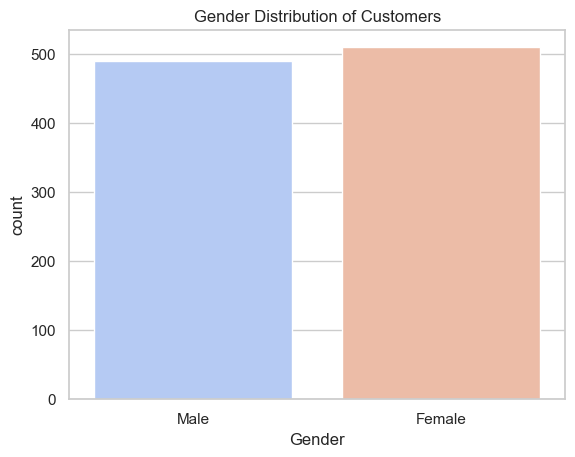

In [5]:
plt.Figure(figsize=(6,4))
sns.countplot(data=df, x='Gender', palette='coolwarm')
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('count')

plt.savefig("visuals/Gender_Distribution_customers.png", bbox_inches='tight', dpi=300)
plt.show()

## SALES by Product Category

C:\Users\abhay\AppData\Local\Temp\ipykernel_11460\3093540568.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')


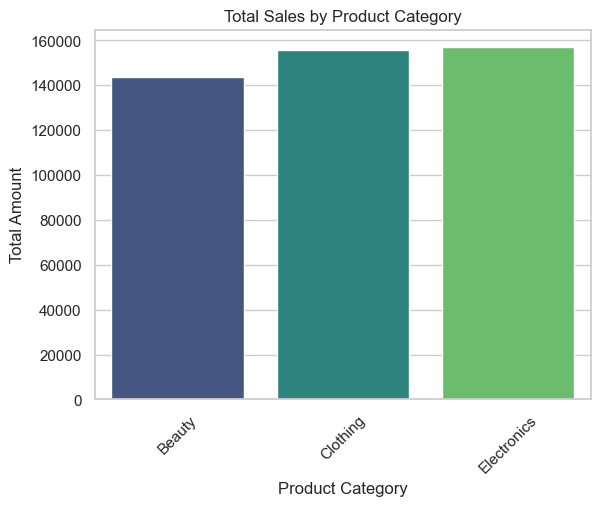

In [6]:
plt.Figure(figsize=(8, 5))
category_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()
sns.barplot(data=category_sales, x='Product Category', y='Total Amount', palette='viridis')
plt.title('Total Sales by Product Category')
plt.xticks(rotation=45)

plt.savefig("visuals/Total_sales_by_product_category",bbox_inches='tight', dpi=30)
plt.show()

## Monthly Sales Trend

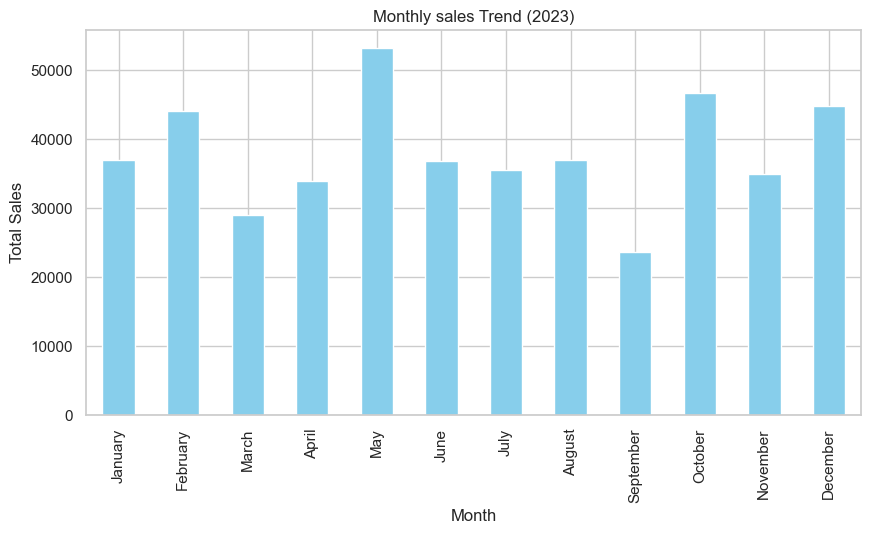

In [8]:
plt.figure(figsize=(10,5))
monthly_sales = df.groupby('Month')['Total Amount'].sum().reindex([
    'January','February','March','April','May','June','July','August',
    'September','October','November','December'
])

monthly_sales.plot(kind='bar', color='skyblue')
plt.title('Monthly sales Trend (2023)')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.savefig("visuals/Monthly_sales_trends.png", bbox_inches='tight', dpi=300)
plt.show()

## Age Group vs Total Spending

C:\Users\abhay\AppData\Local\Temp\ipykernel_11460\1195347980.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


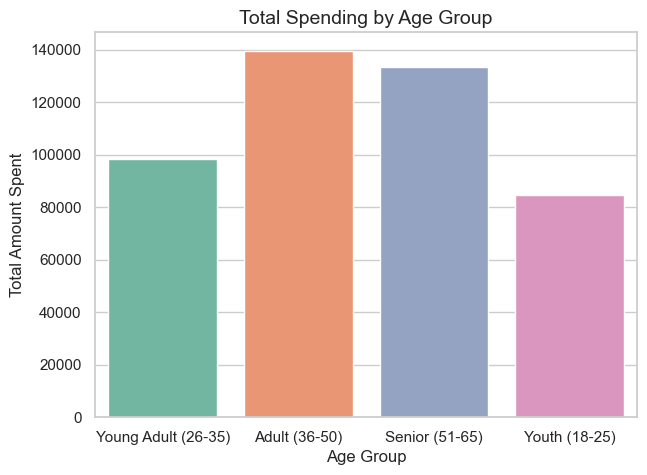

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7,5))
sns.barplot(
    data=df,
    x='Age Group',       # more readable than raw age
    y='Total Amount',
    estimator=sum,
    errorbar=None,
    palette='Set2'       # ✅ correct spelling and case
)

plt.title("Total Spending by Age Group", fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)

plt.savefig("visuals/Total_spending_by_age_group.png", bbox_inches='tight', dpi=300)
plt.show()


## Correlation Heatmap

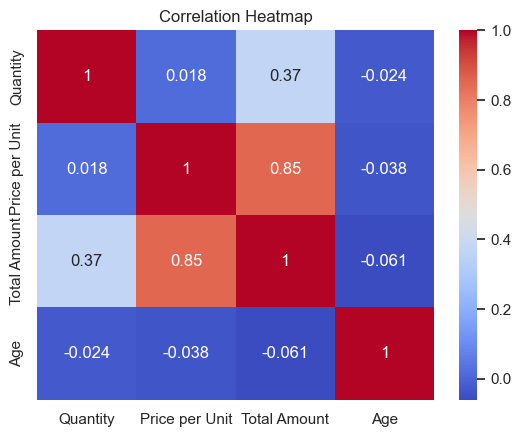

In [16]:
plt.Figure(figsize=(6,4))
sns.heatmap(df[['Quantity', 'Price per Unit', 'Total Amount', 'Age']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

plt.savefig("visuals/correlation_heatmap.png", bbox_inches='tight', dpi=300)
plt.show()

## Top 10 Customers by Spending

C:\Users\abhay\AppData\Local\Temp\ipykernel_11460\2596285.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x='Customer ID', y='Total Amount', palette='magma')


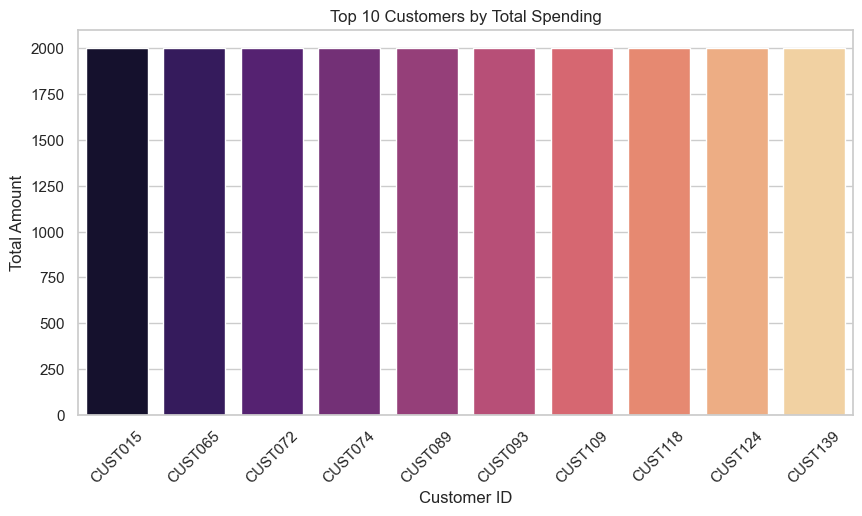

In [17]:
top_customers = df.groupby('Customer ID')['Total Amount'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top_customers, x='Customer ID', y='Total Amount', palette='magma')
plt.title('Top 10 Customers by Total Spending')
plt.xticks(rotation=45)

plt.savefig("visuals/top_10_customers_total_spending.png", bbox_inches='tight', dpi=300)
plt.show()
